<a href="https://colab.research.google.com/github/sridevibonthu/SPRAG/blob/main/Inference/modelinference_SBERTstsbdistillbert_SPRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -U sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util
import numpy as np


In [5]:
# Load the trained model
#model_path = "/content/drive/MyDrive/PhD/Application/PyDSVocab"
model = SentenceTransformer("stsb-distilbert-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
def make_predictions(model, pairs):
    # Initialize an empty list to hold the predicted scores
    scores = []

    # Loop through each pair of sentences
    for pair in pairs:
        # Get the embeddings for the pair of sentences
        sentence_embeddings = model.encode(pair.texts)

        # Calculate the similarity score between the two sentences
        #similarity_score = np.dot(sentence_embeddings[0], sentence_embeddings[1])
        #cosine_sim = cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[1]])[0][0][0]
        cosine_sim = util.cos_sim(sentence_embeddings[0], sentence_embeddings[1])[0][0]
        # Append the similarity score to the list of scores
        scores.append((cosine_sim+1)/2)

    return scores

In [7]:
import pandas as pd
data = pd.read_csv("refstdcombined_ft.csv")
data.columns

Index(['Unnamed: 0', 'QuestionID', 'ReferenceAnswer', 'StudentAnswer',
       'Score1', 'Score2', 'avg_score', 'max_score'],
      dtype='object')

In [8]:
data['bin_score'] = data.apply(lambda row : 1 if row.avg_score>=3 else 0, axis=1)

In [9]:
data = data.dropna()

In [10]:
from sklearn.model_selection import train_test_split

# Storing labels in array
labels = data['bin_score'].values

# Dropping labels column from data
data = data.drop(['bin_score'], axis=1)

# Splitting data into train and test sets in a 70/30 ratio
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=42, test_size=0.3)

In [11]:
# Prepare sentence pairs (using your provided function)
from sentence_transformers import InputExample
# Select 5 random rows
#random_rows = data.sample(n=1000)

# Extract required columns
ref_answers = test_data['ReferenceAnswer'].tolist()
std_answers = test_data['StudentAnswer'].tolist()
max_scores = test_labels.tolist()
#ref_answers = ['python is easy', 'keywords have predefined meaning', 'List, Set and Dictionary are mutable data structures in python']
#std_answers = ['python is simple', 'i do not know anything', 'Tha object structures which can be changeable are called mutable data structures']
pairs = []
for i in range(len(ref_answers)):
    #print(i)
    pairs.append(InputExample(texts=[ref_answers[i], std_answers[i]]))

In [12]:
# Make predictions using the trained model
predicted_scores = make_predictions(model, pairs)

In [13]:
threshold = 0.6980
#actual = np.where(np.array(random_rows['avg_score'])>=3,1,0)
actual = test_labels
print(actual[:10])
preds_encoded = np.where(np.array(predicted_scores)>threshold,1,0)
print(preds_encoded[:10])

[1 1 1 1 1 0 1 0 1 1]
[1 1 1 1 1 1 1 1 1 1]


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()



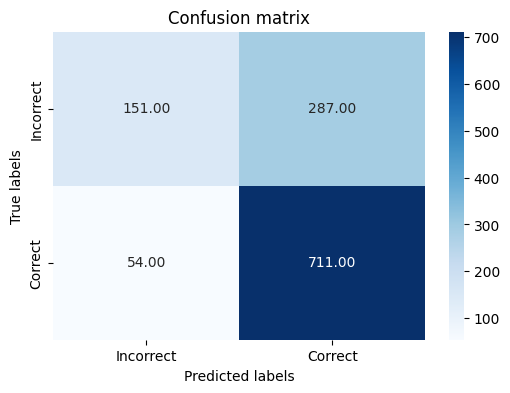

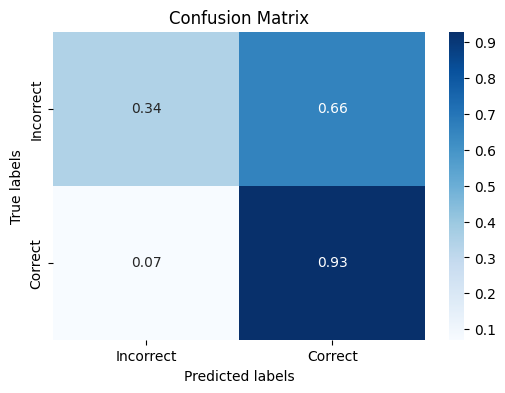

In [15]:
# Example usage:
# Define your actual and predicted binary values
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

# Define class labels
classes = ['Incorrect', 'Correct']

# Plot non-normalized confusion matrix
plot_confusion_matrix(actual, preds_encoded, classes=classes, normalize=False, title='Confusion matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(actual, preds_encoded, classes=classes, normalize=True, title='Confusion Matrix')

In [16]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(actual, preds_encoded))

print(accuracy_score(actual, preds_encoded))

              precision    recall  f1-score   support

           0       0.74      0.34      0.47       438
           1       0.71      0.93      0.81       765

    accuracy                           0.72      1203
   macro avg       0.72      0.64      0.64      1203
weighted avg       0.72      0.72      0.68      1203

0.7165419783873649


In [17]:
from sklearn.metrics import f1_score
f1 = f1_score(actual, preds_encoded)
print("F1 Score:", f1)

F1 Score: 0.8065796937039138


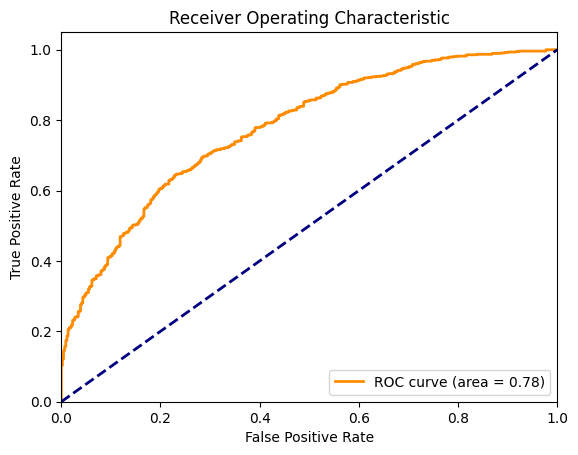

In [18]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(actual,predicted_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

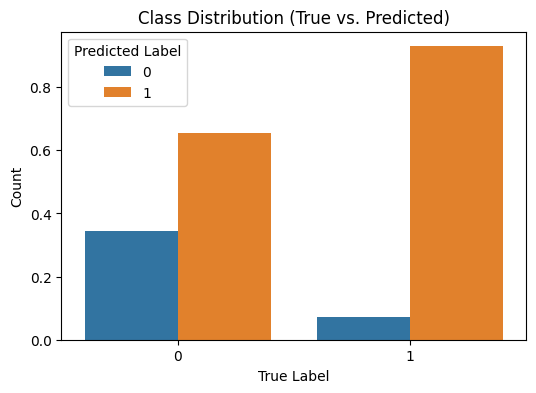

In [19]:
#Class Distribution plot
# Create a DataFrame with true and predicted labels
data = {
    'True Label': actual,
    'Predicted Label': preds_encoded
}
df = pd.DataFrame(data)
# Count occurrences of true and predicted labels
counts = df.groupby(['True Label', 'Predicted Label']).size().reset_index(name='Count')

# Normalize the counts
counts['Normalized Count'] = counts.groupby('True Label')['Count'].transform(lambda x: x / x.sum())

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x='True Label', y='Normalized Count', hue='Predicted Label', data=counts)
plt.title('Class Distribution (True vs. Predicted)')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.legend(title='Predicted Label')
plt.show()